# Problema 1

#### Solutia in forma inchisa este: w* =(X.T @ X)^-1 @ X.T @ t =  np.linalg.pinv(X) @ t

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataset import *

Daca evaluam modelul cu RMSE nu e nevoie de rescrierea formei complete, forma completa se bazeaza pe functia de loss = distanta euclidiana dintre cei doi vectori, prezis si real.

RMSE e in aceiasi unitate de masura ca datasetul, deci nu e normalizat si trebuie evaluat impreauna cu range-ul de valori.

RMSE pt regresie liniara pe primul dataset este 10.25 la un noise de 10, ceea ce este ok tinand cont ca rangeul de valori este [-200,200]

RMSE pt al doilea dataset este 0.9 pentru rangeul [5,9].

RMSE aproape egal pt test si train set deci nu face nici underfitiing nici overfitting.

RMSE creste direct proportional (liniar) cu noise

In [3]:


X_simple,t_simple = simple_dataset(noise=10)
# X_simple = np.reshape(X_simple,X_simple.shape[0])

division_ratio = 0.8
split_point =int(division_ratio * len(X_simple)) 

X_train_simple = X_simple[:split_point]
X_test_simple = X_simple[split_point:]

t_train_simple = t_simple[:split_point]
t_test_simple = t_simple[split_point:]


# X_complex,t_complex = complex_dataset()
# X_complex = X_complex[:,np.newaxis]
# # tmp = np.array([[x] for x in X_complex])
# # X_complex = tmp

# split_point =int(division_ratio * len(X_complex)) 

# X_train_complex = X_complex[:split_point]
# X_test_complex = X_complex[split_point:]

# t_train_complex = t_complex[:split_point]
# t_test_complex = t_complex[split_point:]


X_complex,t_complex = remodel_complex_dataset()

split_point =int(division_ratio * len(X_complex)) 

X_train_complex = X_complex[:split_point]
X_test_complex = X_complex[split_point:]

t_train_complex = t_complex[:split_point]
t_test_complex = t_complex[split_point:]


X_complex_default,t_complex_default = complex_dataset()

split_point =int(division_ratio * len(X_complex_default))

X_train_complex_default = X_complex_default[:split_point]
X_test_complex_default = X_complex_default[split_point:]

t_train_complex_default = t_complex_default[:split_point]
t_test_complex_default = t_complex_default[split_point:]


print(X_train_simple.shape)
print(t_train_simple.shape)

print(X_train_complex.shape)
print(t_train_complex.shape)

print(X_test_complex.shape)
print(t_test_complex.shape)


(160, 1)
(160,)
(229, 13)
(229,)
(58, 13)
(58,)


In [4]:
class LinearRegression(object):
    """
    Modelul de Regresie Liniara
    y = X @ w 
        - valoarea prezisă de model
    t ~ N(t|X @ w, var) 
        - valorile de antrenare (target) sunt fac parte dintr-o distributie normala in jurul mean-ului X@w, 
          la care se adauga zgomot dat de varianta `var`
    """

    def fit(self, X, t):
        """
        Antrenarea modelului in sensul celor mai mici patrate (least squares fitting)
        Parameterii
        ----------
        X : (N, D) np.ndarray
            variabilele de intrare
        t : (N,) np.ndarray
            variabilele tinta (target / ground truth)
        """

        N, D = X.shape
        
        self.w = np.linalg.pinv(X) @ t
        # print(X.shape,t.shape,"IN FIT")
        self.var = np.mean(np.square(X @ self.w - t))

    def predict(self, X, return_std=False):
        """
        Intoarce valoari prezise de model pentru sample-uri X
        Parametrii
        ----------
        X : (N, D) np.ndarray
            sample-uri de valori D-dimensionale pentru care se doreste predictia valorii conform modelului
        return_std : bool, optional
            intoarce deviatia standard a fiecarei valori prezice, daca e setat pe True
        
        Intoarce
        -------
        y : (N,) np.ndarray
            vector de valori prezise
        y_std : (N,) np.ndarray
            deviatia standard a fiecarei valori prezise
        """

        N, D = X.shape

        y = X @ self.w
        # print(X.shape,y.shape,"IN predict")
        
        if return_std:

            y_std = np.sqrt(self.var) 

            return y, y_std
        return y

In [5]:
def extract_polynomial_features(X, M):
    phi = X
    return np.array([x ** np.arange(M + 1) for x in phi])

In [6]:
def mean_squared_error(y, t):
    return np.mean((y - t) * (y- t))

def normalised_squared_error(y,t):
    return np.mean((y - t) / t.max()  * (y- t) / t.max())

def RMSE(y,t):
    return np.sqrt(mean_squared_error(y,t))

def NRMSE(y,t):
    return RMSE(y,t) / (np.max(t) - np.min(t))

In [7]:
#TOOD: Vezi de ce e eroarea asa mare

model = LinearRegression()
## pentru bias
X_train_feat = extract_polynomial_features(X_train_simple,1) 
X_test_feat = extract_polynomial_features(X_test_simple,1)

# print(X_train_simple[:10],X_train_feat[:10])

model.fit(X_train_feat,t_train_simple)

y_train,y_train_std = model.predict(X_train_feat,return_std=True)
y_test,y_test_std = model.predict(X_test_feat,return_std=True)

print("Train error:",mean_squared_error(y_train,t_train_simple))
print("Test error:",mean_squared_error(y_test,t_test_simple))

print("Train error normalised:",normalised_squared_error(y_train,t_train_simple))
print("Test error normalised:",normalised_squared_error(y_test,t_test_simple))
print("Test error RMSE:",RMSE(y_test,t_test_simple))
print("Test error NRMSE:",NRMSE(y_test,t_test_simple))

Train error: 105.4194489334061
Test error: 105.2454888577342
Train error normalised: 0.012542757652957065
Test error normalised: 0.010027856358512815
Test error RMSE: 10.258922402364403
Test error NRMSE: 0.05425299162516162


(40, 1)
(40,)


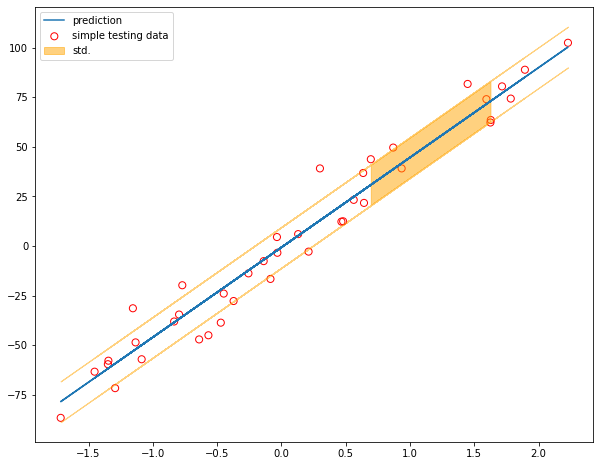

(40,)


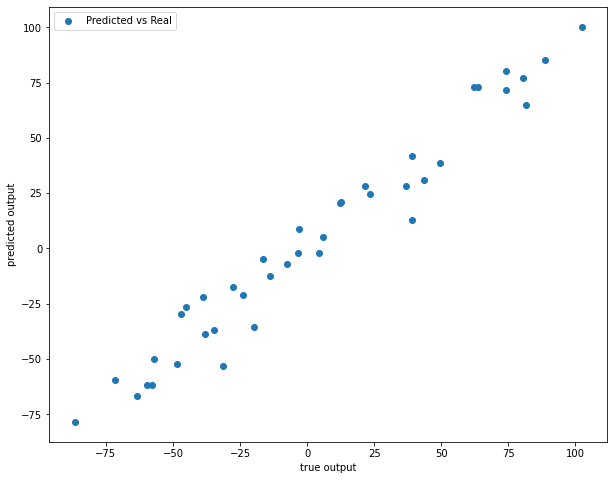

In [8]:
fig = plt.figure(figsize=(10, 8))

plt.scatter(X_test_simple, t_test_simple, facecolor="none", edgecolor="r", s=50, label="simple testing data")
plt.plot(X_test_simple,y_test,label='prediction')

print(X_test_simple.shape)
print(np.reshape(X_test_simple,X_test_simple.shape[0]).shape)

# TODO: vezi de ce nu coloreaza bine are ceva cu X_test
plt.fill_between(
    np.reshape(X_test_simple,X_test_simple.shape[0]), y_test - y_test_std , y_test + y_test_std ,
    color="orange", alpha=0.5, label="std.")

plt.legend()
plt.show()
print(y_test.shape)
fig = plt.figure(figsize=(10, 8))
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.scatter(t_test_simple,y_test,label='Predicted vs Real')

plt.legend()
plt.show()




##### Antrenam si testam modelul pe setul de date complex remodelat astfel incat fiecare x -> [x0,x1,...x] unde x0..x10 sunt ultimele 11 valori pe care le-a avut x. In acest mod, regresia liniara obtine rezultate bune. 

In [9]:
model = LinearRegression()
M = 1

X_train_feat = X_train_complex
X_test_feat = X_test_complex

model.fit(X_train_feat,t_train_complex)
y_train,y_train_std = model.predict(X_train_feat,return_std=True)
y_test,y_test_std = model.predict(X_test_feat,return_std=True)

print("Train error:",mean_squared_error(y_train,t_train_complex))
print("Test error:",mean_squared_error(y_test,t_test_complex))
print("Train error normalised:",normalised_squared_error(y_train,t_train_complex))
print("Test error normalised:",normalised_squared_error(y_test,t_test_complex))
print("Test error RMSE:",RMSE(y_test,t_test_complex))
print("Test error NRMSE:",NRMSE(y_test,t_test_complex))

Train error: 0.3586484042697611
Test error: 0.412850411365934
Train error normalised: 0.00822935514449116
Test error normalised: 0.0032984292853570035
Test error RMSE: 0.6425343659026604
Test error NRMSE: 0.1016680762168074


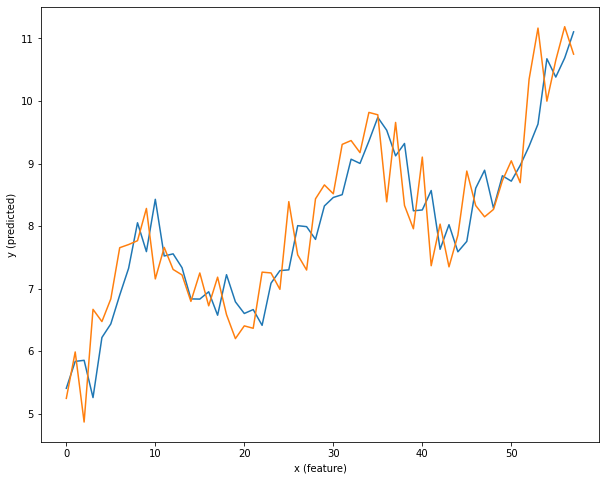

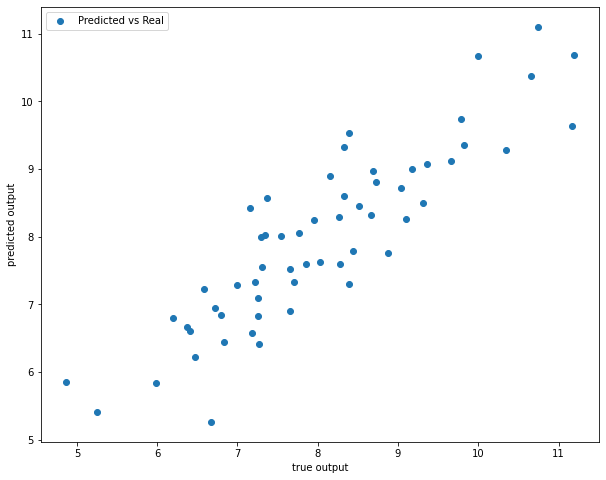

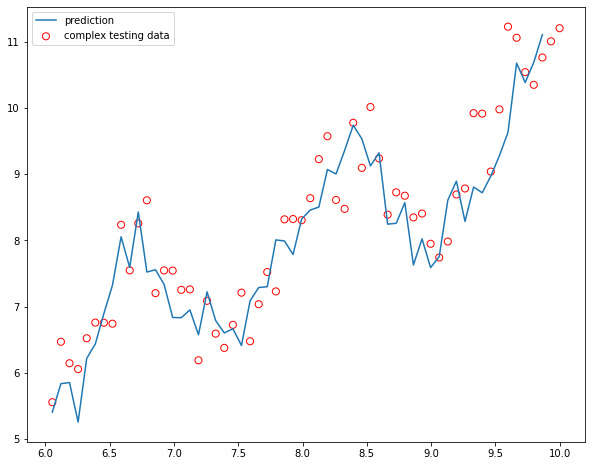

In [17]:
fig = plt.figure(figsize=(10, 8))
plt.xlabel("x (feature)")
plt.ylabel("y (predicted)")

plt.plot(y_test)
plt.plot(t_test_complex)

fig = plt.figure(figsize=(10, 8))
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.scatter(t_test_complex,y_test,label='Predicted vs Real')

plt.legend()
plt.show()

fig = plt.figure(figsize=(10, 8))

plt.scatter(X_test_complex_default, t_test_complex_default, facecolor="none", edgecolor="r", s=50, label="complex testing data")
plt.plot(X_test_complex_default[:58],y_test,label='prediction')
plt.legend()
plt.show()

#### Antrenam modelul pe setul de date complex nemodificat

Train error: 0.8056804652805044
Test error: 0.6166189706639972
Train error normalised: 0.01879052360236261
Test error normalised: 0.004894063935585223
Test error RMSE: 0.7852508966336792
Test error NRMSE: 0.13857100058164243


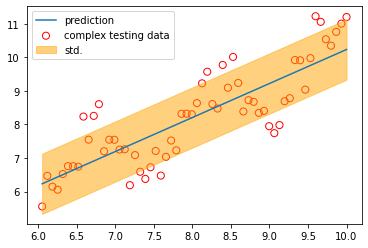

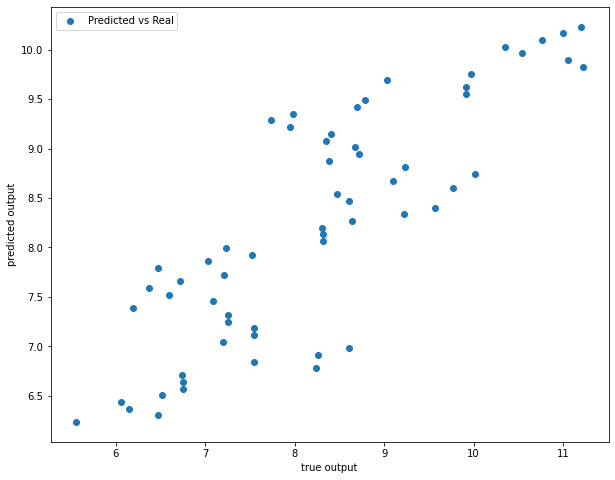

In [22]:
model = LinearRegression()
M = 1

X_train_feat = extract_polynomial_features(X_train_complex_default,1) 
X_test_feat = extract_polynomial_features(X_test_complex_default,1)

model.fit(X_train_feat,t_train_complex_default)

y_train,y_train_std = model.predict(X_train_feat,return_std=True)
y_test,y_test_std = model.predict(X_test_feat,return_std=True)

print("Train error:",mean_squared_error(y_train,t_train_complex_default))
print("Test error:",mean_squared_error(y_test,t_test_complex_default))

print("Train error normalised:",normalised_squared_error(y_train,t_train_complex_default))
print("Test error normalised:",normalised_squared_error(y_test,t_test_complex_default))
print("Test error RMSE:",RMSE(y_test,t_test_complex_default))
print("Test error NRMSE:",NRMSE(y_test,t_test_complex_default))

plt.scatter(X_test_complex_default, t_test_complex_default, facecolor="none", edgecolor="r", s=50, label="complex testing data")
plt.plot(X_test_complex_default,y_test,label='prediction')

# print(X_test_simple.shape)
# print(np.reshape(X_test_simple,X_test_simple.shape[0]).shape)

# TODO: vezi de ce nu coloreaza bine are ceva cu X_test
plt.fill_between(
    np.reshape(X_test_complex_default,X_test_complex_default.shape[0]), y_test - y_test_std , y_test + y_test_std ,
    color="orange", alpha=0.5, label="std.")

plt.legend()
plt.show()

fig = plt.figure(figsize=(10, 8))
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.scatter(t_test_complex_default,y_test,label='Predicted vs Real')

plt.legend()
plt.show()

